In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
tf.random.set_seed(3)

In [2]:
import cv2
from PIL import Image

In [3]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

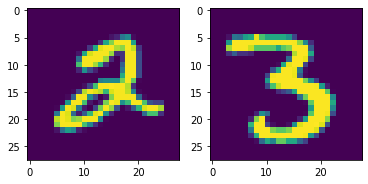

In [6]:
plt.subplot(1,2,1)
img = Image.fromarray(X_train[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_train[12])
plt.imshow(img)

Setting up the Layers of NN

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
                        ])

In [8]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [9]:
history = model.fit(X_train,Y_train,validation_split=0.25,epochs=50)

Epoch 1/50
1407/1407 [==============================] - 8s 4ms/step - loss: 1.2834 - accuracy: 0.7728 - val_loss: 0.3921 - val_accuracy: 0.8890
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3486 - accuracy: 0.9061 - val_loss: 0.3019 - val_accuracy: 0.9130
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2524 - accuracy: 0.9298 - val_loss: 0.2313 - val_accuracy: 0.9359
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2037 - accuracy: 0.9413 - val_loss: 0.1957 - val_accuracy: 0.9455
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1751 - accuracy: 0.9500 - val_loss: 0.2200 - val_accuracy: 0.9417
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1570 - accuracy: 0.9561 - val_loss: 0.1683 - val_accuracy: 0.9529
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1389 - accuracy: 0.9596 - val_loss: 0.1771 - val_accuracy:

In [10]:
loss,metrics = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3090 - accuracy: 0.9605


1 9


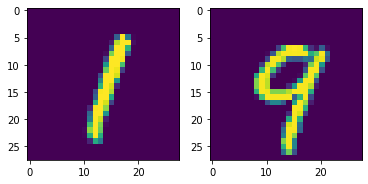

In [11]:
plt.subplot(1,2,1)
img = Image.fromarray(X_test[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_test[12])
plt.imshow(img)
print(Y_test[5],Y_test[12])

In [12]:
test_pred = model.predict(X_test)

In [13]:
Y_arg_max_list = [np.argmax(i) for i in test_pred]

In [14]:
Y_arg_max_list[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_arg_max_list)
print(cnf_matrix)

[[ 954    0    2    4    2    1   12    3    2    0]
 [   0 1092    3    1    0    2    4    2   31    0]
 [   6    1  983   20    1    2    6    3   10    0]
 [   0    1    9  977    0    9    0    3    9    2]
 [   1    2    1    2  939    0   14    2    4   17]
 [   2    0    1   13    0  859   10    1    3    3]
 [   1    2    2    0    2    5  941    0    5    0]
 [   1    6   11    9    1    0    0  987    5    8]
 [   6    0    4   15    2   12    4    4  924    3]
 [   2    4    2   19    8    6    1    6   12  949]]


Text(0.5, 69.0, 'Predicted Labels')

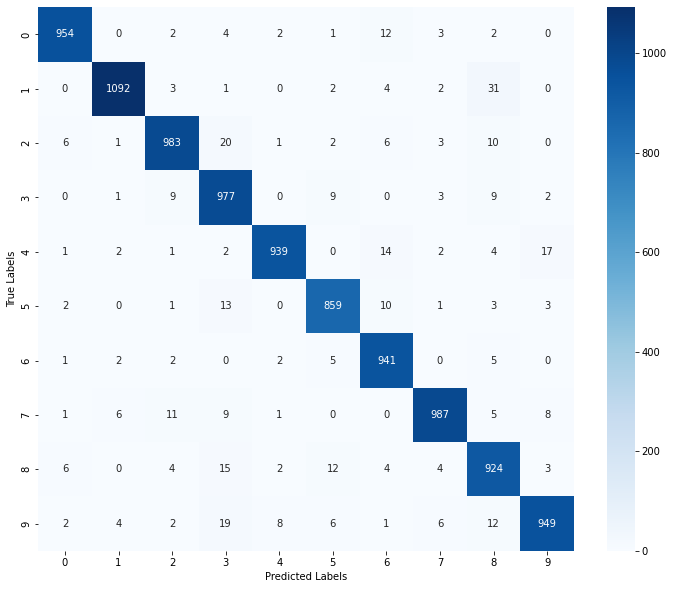

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(cnf_matrix,annot=True,cmap ='Blues',fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

3

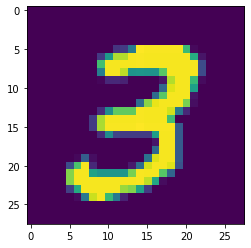

In [17]:
test_img = cv2.imread(r'MNIST_digit.png')
test_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)
test_img = cv2.resize(test_img,(28,28))
plt.imshow(test_img)
scaled_img = test_img/255
img_reshape = np.reshape(scaled_img,[1,28,28])
input_pred = model.predict(img_reshape)
np.argmax(input_pred)